In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.15.0


The latest stable version of TensorFlow is 2.17.0, released on July 11, 2024. You can find it on the TensorFlow PyPI page:

https://pypi.org/project/tensorflow/

You can also find information about the latest and older releases, including release notes, on the TensorFlow GitHub page:

https://github.com/tensorflow/tensorflow/releases

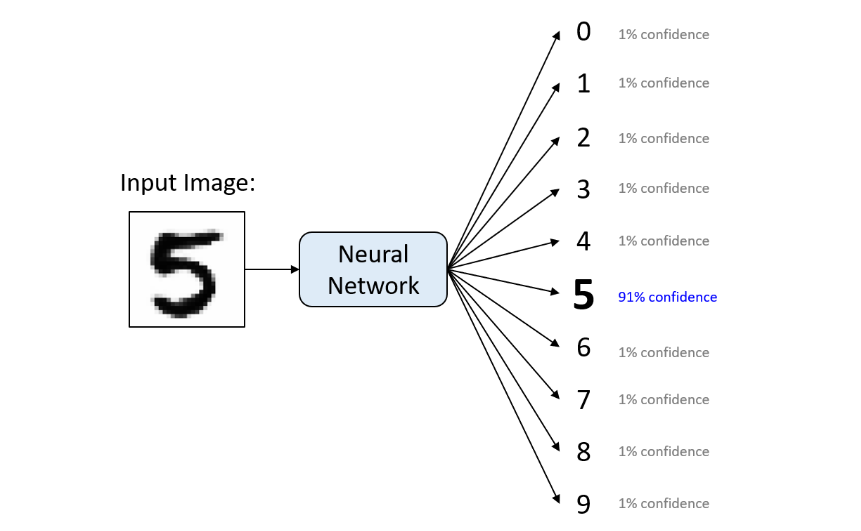

In [2]:
# Set common constants
# Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9.
this_repo_url = 'https://github.com/arunkumarramanan/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

Understanding the Image Data

NumPy Arrays:

The images are stored in a format called NumPy arrays. NumPy is a powerful Python library for working with numerical data, and it's the foundation for many data science and machine learning tools.
Arrays are essentially grids of numbers. In this case, each image is a 2D array (28 rows by 28 columns), and each element in the array represents a single pixel in the image.
Pixel Values:

Each pixel value in the array ranges from 0 to 255. This is a standard way to represent grayscale images:
0 represents pure black.
255 represents pure white.
Values in between represent different shades of gray.

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11490434/11490434 [==============================] - 1s 0us/step


train_images, train_labels, test_images, test_labels = keras.datasets.mnist.load_data(): This line loads the MNIST dataset using the load_data() function from the Keras library. MNIST is a popular dataset consisting of handwritten digits from 0 to 9. It contains a training set (train_images and train_labels) and a test set (test_images and test_labels).

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1): In this line, the train_images array is reshaped to match the desired input shape for a convolutional neural network (CNN). The original shape of train_images is (60000, 28, 28), where 60000 is the number of training examples, and each example is a 28x28 grayscale image. By using reshape(), the shape is transformed to (60000, 28, 28, 1), where the additional dimension of 1 represents a single channel(grey scale images). In this case, the images are grayscale, so there is only one channel.

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1): Similarly, the test_images array is reshaped to match the same input shape as the training set. The shape of test_images is (10000, 28, 28) initially, and it is transformed to (10000, 28, 28, 1) to ensure compatibility with the model.

Reshaping the input images is necessary when using CNNs because they typically expect a 4-dimensional input tensor with the dimensions representing the number of samples, height, width, and channels. In this case, the single channel represents the grayscale intensity of each pixel in the images.

Single Channel Input:  When your images are grayscale, you need to reshape them to have a shape like (batch_size, height, width, 1). The '1' at the end explicitly tells the model that there's only one channel (grayscale).

Multiple Channel Input: For color images (RGB), the shape would be (batch_size, height, width, 3), where '3' represents the three color channels.

In [4]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

def preprocess_images(imgs):: This line defines a function called preprocess_images that takes an input parameter imgs, which represents the images to be preprocessed.

sample_img = imgs if len(imgs.shape) == 2 else imgs[0]: This line checks the shape of the input images. If the shape has a length of 2, it means that only a single image is passed. In this case, sample_img is set equal to imgs. Otherwise, if the shape has a length greater than 2, it implies that multiple images are passed, and sample_img is set equal to the first image in imgs (i.e., imgs[0]).

assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape: This line performs an assertion check to ensure that the shape of sample_img is either (28, 28, 1) or (28, 28). This assertion verifies that the images are indeed 28x28 pixels in size and either single-channel grayscale or grayscale without an explicit channel dimension.

return imgs / 255.0: This line performs the image preprocessing step by dividing the imgs array (either a single image or multiple images) by 255.0. This division scales down the pixel values from the range of 0-255 to the range of 0.0-1.0. This normalization is commonly done in image processing tasks to ensure that the pixel values are within a consistent range and to facilitate better convergence during training.

Finally, the preprocess_images function is called for both train_images and test_images, and the results are assigned back to train_images and test_images, respectively. This applies the preprocessing steps to the image data before using it for training or testing a machine learning model.

Different Input Shapes:

A single grayscale image is typically represented as a 2D array with shape (height, width), for example, (28, 28).
A batch of grayscale images is represented as a 3D array with shape (number_of_images, height, width), for example, (128, 28, 28).
The code needs to handle both scenarios so that it can be used in different contexts:

During training, you might pass a batch of images to the preprocessing function for efficiency.
During inference (making predictions), you might pass a single image.
Assertion Consistency:

The assert statement checks if the sample image has a valid shape. By selecting a single image from the batch (if it's a batch), the assertion remains consistent regardless of the input type. This ensures that the image dimensions are always validated, whether it's a single image or part of a batch.

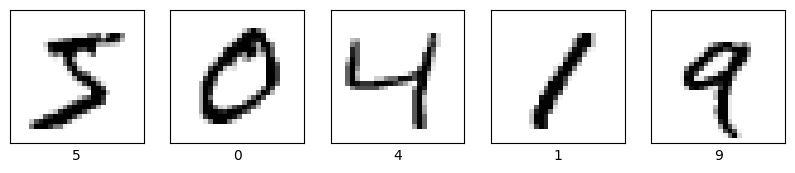

In [5]:
#Display the first 5 images from the training set and display the class name below each image.
# Verify that the data is in the correct format and we're ready to build and train the network.

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.figure(figsize=(10,2)):# This line creates a new figure object with a specified size of 10 inches in width and 2 inches in height. This size will affect the overall dimensions of the figure that will contain the subplots.

for i in range(5): #This line starts a loop that iterates five times. It will execute the following code block five times to plot five images.

plt.subplot(1,5,i+1): #This line creates a subplot within the figure. The subplot is organized in a 1x5 grid, meaning that there will be one row and five columns of subplots. The i+1 argument specifies the position of the current subplot within the grid.

plt.xticks([]) and plt.yticks([]): #These lines remove the tick marks from both the x-axis and y-axis of the subplot, resulting in a cleaner plot without numerical labels on the axes.

plt.grid(False): #This line turns off the grid lines in the subplot.

plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary): #This line displays the image at index i from the train_images array. The reshape(28, 28) is used to ensure that the image is in the correct shape for display, as it was originally reshaped to have an additional channel dimension earlier. The cmap=plt.cm.binary argument specifies that the image should be displayed in a binary color map, which is suitable for grayscale images.

plt.xlabel(train_labels[i]): #This line sets the label for the x-axis of the subplot to the corresponding label from the train_labels array at index i. The label represents the digit that the image represents.

By executing this code, you would see a figure with five subplots, each displaying a grayscale image from the MNIST dataset along with its corresponding label. The images will be arranged horizontally, and the labels will be shown below each image.

In [6]:
# Build the model

model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))



model = keras.Sequential(): This line creates a sequential model object. The sequential model is a linear stack of layers where the data flows sequentially from one layer to the next.

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))): This line adds a convolutional layer to the model. The layer has 32 filters, each of size 3x3. The activation='relu' argument specifies that the rectified linear unit (ReLU) activation function should be applied to the output of this layer. The input_shape=(28, 28, 1) argument defines the shape of the input data, which is a 28x28 grayscale image with a single channel.

model.add(Conv2D(64, (3, 3), activation='relu')): This line adds another convolutional layer to the model. This layer has 64 filters, each of size 3x3, and applies the ReLU activation function.

model.add(MaxPooling2D(pool_size=(2, 2))): This line adds a max-pooling layer to the model. Max-pooling helps in downsampling the feature maps and reducing spatial dimensions. The pool_size=(2, 2) argument specifies that a 2x2 pooling window will be used.MaxPooling2D is a pooling operation commonly used in Convolutional Neural Networks (CNNs). It's a way to downsample feature maps (the outputs of convolutional layers) by reducing their spatial dimensions (height and width) while retaining the most important information.

model.add(Dropout(0.25)): This line adds a dropout layer to the model. Dropout randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting. The argument 0.25 specifies that 25% of the input units will be dropped.

model.add(Flatten()): This line adds a flatten layer to the model. The flatten layer converts the multidimensional output from the previous layer into a one-dimensional vector, as the subsequent layers in the model require a flattened input.

model.add(Dense(128, activation='relu')): This line adds a fully connected (dense) layer to the model. The layer has 128 neurons, and the ReLU activation function is applied to the output of this layer.

model.add(Dropout(0.5)): This line adds another dropout layer to the model with a dropout rate of 50% (0.5). How Dropout Works:

Random "Dropping": During each training step, dropout randomly selects a fraction (in this case, 25%) of the neurons in the layer and temporarily deactivates them. This means their outputs are set to zero for that particular training step.
Forced Adaptability: By deactivating neurons randomly, dropout prevents the network from relying too heavily on any single neuron or a small group of neurons. The remaining neurons are forced to adapt and learn to contribute more independently to the overall prediction.
Ensemble Effect: Dropout can be seen as a way of training a large ensemble of smaller networks. Each training step effectively samples a different subnetwork by dropping different neurons. The final model then averages the predictions of these subnetworks, leading to better generalization.

model.add(Dense(10, activation='softmax')): This line adds the final dense layer to the model. This layer has 10 neurons, corresponding to the 10 possible classes in the MNIST dataset (digits 0-9). The activation function used here is softmax, which outputs a probability distribution over the classes.

In summary, the code defines a CNN model with two convolutional layers, max-pooling, dropout layers for regularization, fully connected layers, and a final softmax layer for classification. The model architecture is designed to extract relevant features from the input images and make predictions for each class in the MNIST dataset.

In [7]:
#Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

#Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.
#Optimizer - how the model is updated based on the data it sees and its loss function.
#Metrics - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']): This line compiles the model with specific settings for the optimizer, loss function, and evaluation metrics.

optimizer='adam': This argument specifies the optimizer to be used during the training process. In this case, the Adam optimizer is used. Adam is a popular optimization algorithm that adapts the learning rate based on the gradients of the model's parameters, making it effective for training deep neural networks.

loss='sparse_categorical_crossentropy': This argument specifies the loss function to be used during training. The choice of sparse_categorical_crossentropy indicates that the model will be trained using a multi-class classification setup where the labels are integers (e.g., 0, 1, 2, ...). The sparse categorical cross-entropy loss function is suitable for such scenarios.

metrics=['accuracy']: This argument specifies the evaluation metric to be used during training and testing. In this case, the accuracy metric is chosen, which measures the proportion of correctly classified samples.

By calling model.compile() with these settings, the model is prepared for training. During the training process, the optimizer will minimize the specified loss function, and the accuracy metric will be calculated to monitor the model's performance.

In [8]:
#Train the model
#Training the neural network model requires the following steps:

#Feed the training data to the model—in this example, the train_images and train_labels arrays.
#The model learns to associate images and labels.
#We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
#To start training, call the model.fit method—the model is "fit" to the training data:

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 177s 94ms/step - loss: 0.1851 - accuracy: 0.9438
Epoch 2/5
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0768 - accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0608 - accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0466 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0409 - accuracy: 0.9874


history = model.fit(train_images, train_labels, epochs=5): This line starts the training process for the model. The fit() function is called on the model object with the following arguments:

train_images: This argument represents the input training images that will be used to train the model. These images are expected to be in the shape specified during model construction (28x28 grayscale images with a single channel).

train_labels: This argument represents the corresponding labels for the training images. The labels should be provided as integers, indicating the true class of each image.

epochs=5: This argument specifies the number of training epochs, which is the number of times the model will iterate over the entire training dataset. In this case, the model will be trained for 5 epochs.

The fit() function starts the training process by iterating over the training data for the specified number of epochs. During each epoch, the model adjusts its internal parameters using the optimizer and loss function specified during compilation. The model tries to minimize the loss and improve its accuracy on the training data.

The training progress is stored in the history variable, which contains information about the loss and accuracy metrics at each epoch. This information can be useful for analyzing the model's performance and visualizing the training progress.

In [9]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 8s 25ms/step - loss: 0.0275 - accuracy: 0.9913
Test accuracy: 0.9912999868392944


1/1 [==============================] - 0s 39ms/step


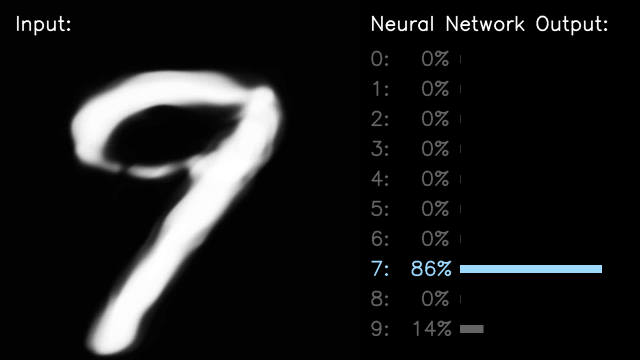

In [ ]:

mnist_dream_path = 'images/mnist_dream.mp4'
mnist_prediction_path = 'images/mnist_dream_predicted.mp4'

# download the video if running in Colab
if not os.path.isfile(mnist_dream_path):
    print('downloading the sample video...')
    vid_url = this_tutorial_url + '/' + mnist_dream_path

    mnist_dream_path = urllib.request.urlretrieve(vid_url)[0]

def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes()
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)

cap = cv2.VideoCapture(mnist_dream_path)
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed

# go through all the frames and run our classifier on the high res MNIST images as they morph from number to number
while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break

    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))

    #preprocess the image for prediction
    img_proc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_proc = cv2.resize(img_proc, (28, 28))
    img_proc = preprocess_images(img_proc)
    img_proc = 1 - img_proc # inverse since training dataset is white text with black background

    net_in = np.expand_dims(img_proc, axis=0) # expand dimension to specify batch size of 1
    net_in = np.expand_dims(net_in, axis=3) # expand dimension to specify number of channels

    preds = model.predict(net_in)[0]
    guess = np.argmax(preds)
    perc = np.rint(preds * 100).astype(int)

    img = 255 - img
    pad_color = 0
    img = np.pad(img, ((0,0), (0,1280-720), (0,0)), mode='constant', constant_values=(pad_color))

    line_type = cv2.LINE_AA
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3
    thickness = 2
    x, y = 740, 60
    color = (255, 255, 255)

    text = "Neural Network Output:"
    cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)

    text = "Input:"
    cv2.putText(img, text=text, org=(30, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)

    y = 130
    for i, p in enumerate(perc):
        if i == guess: color = (255, 218, 158)
        else: color = (100, 100, 100)

        rect_width = 0
        if p > 0: rect_width = int(p * 3.3)

        rect_start = 180
        cv2.rectangle(img, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)

        text = '{}: {:>3}%'.format(i, int(p))
        cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
        y += 60

    # if you don't want to save the output as a video, set this to False
    save_video = True

    if save_video:
        if vw is None:
            codec = cv2.VideoWriter_fourcc(*'DIVX')
            vid_width_height = img.shape[1], img.shape[0]
            vw = cv2.VideoWriter(mnist_prediction_path, codec, 30, vid_width_height)
        # 15 fps above doesn't work robustly so we right frame twice at 30 fps
        vw.write(img)
        vw.write(img)

    # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)

cap.release()
if vw is not None:
    vw.release()

Downloads a sample video (mnist_dream.mp4) if it does not already exist in the specified path.

Defines a helper function, cv2_imshow, that converts an image to PNG format and displays it using the IPython.display module.

Opens the video file (mnist_dream.mp4) using OpenCV's VideoCapture object.

Initializes variables for video writing (vw) and frame counting (frame).

Iterates through each frame of the video using a while loop.

Reads each frame from the video using cap.read() and performs some necessary resizing if the frame shape is not 720x720 pixels.

Preprocesses the image for prediction by converting it to grayscale, resizing it to 28x28 pixels, applying the preprocess_images function, and inverting the pixel values (since the training dataset has white text on a black background).

Expands the dimensions of the preprocessed image to match the expected input shape of the model.

Passes the preprocessed image through the model (model.predict()) to obtain the prediction probabilities for each class.

Determines the predicted class (guess) by finding the index of the highest probability in the prediction array.

Formats the prediction probabilities (perc) and prepares the image for displaying the predictions and input text.

Draws rectangles and text on the image to visualize the prediction probabilities and input label.

Saves the output as a video (mnist_dream_predicted.mp4) if specified, by writing frames to the VideoWriter object (vw).

Displays the processed image with predictions using the cv2_imshow function.

Releases the video capture and video writer objects.

The code processes each frame of the video, runs the model's prediction on the high-resolution MNIST digits, overlays the predictions on the frame, and displays the result. Optionally, it can save the processed frames as a video.

https://www.kaggle.com/code/arunkumarramanan/awesome-ml-frameworks-and-mnist-classification

In [ ]:
#Ensemble Technique - Boost classifier example

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
boost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
boost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boost_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


We load the Breast Cancer Wisconsin dataset using the load_breast_cancer function from scikit-learn. The dataset contains features that describe characteristics of breast cancer tumors, and the target variable represents the diagnosis (malignant or benign).

The dataset is split into training and testing sets using train_test_split function. In this case, 80% of the data is used for training, and 20% is used for testing.

An AdaBoostClassifier is created with 100 estimators (decision trees by default). AdaBoost is an ensemble method that combines weak classifiers into a strong classifier.

The Boost classifier is trained on the training set using the fit method.

Predictions are made on the test set using the predict method.

The accuracy of the Boost classifier is evaluated by comparing the predicted labels (y_pred) with the true labels (y_test), using the accuracy_score function.

Finally, the accuracy is printed to the console.










In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import confusion_matrix


# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Convert the data into a pandas DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
boost_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier
boost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boost_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)



We load the Wine dataset using load_wine() function from scikit-learn. The Wine dataset is a classic dataset for multi-class classification tasks, where the goal is to classify wines into different cultivars based on their chemical properties.

The feature matrix X contains various chemical attributes, while the target variable y contains the corresponding wine cultivar labels.

The dataset is converted into a pandas DataFrame for easier data manipulation and analysis.

The dataset is split into training and testing sets using train_test_split() function from scikit-learn. In this case, 80% of the data is used for training, and 20% is used for testing.

An XGBClassifier from the XGBoost library is created. XGBoost is a powerful gradient boosting algorithm that provides accurate and efficient implementations for classification and regression tasks.

The boosting classifier is trained on the training set using the fit() method.

Predictions are made on the test set using the predict() method.

The accuracy of the boosting classifier is evaluated by comparing the predicted labels (y_pred) with the true labels (y_test), using the accuracy_score() function from scikit-learn.

Finally, the accuracy is printed to the console.